In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# reference 

<a href="https://github.com/ageron/handson-ml/">Hands-On Machine Learning with Scikit-Learn and TensorFlow</a>

# create a series

In [2]:
pd.Series([0, 1, 2, 3])

0    0
1    1
2    2
3    3
dtype: int64

# name

In [3]:
pd.Series([0, 1, 2, 3], name="my_ser")

0    0
1    1
2    2
3    3
Name: my_ser, dtype: int64

# index labels

In [4]:
ser = pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"])
ser

a    0
b    1
c    2
d    3
dtype: int64

In [5]:
ser.loc["b"]

1

In [6]:
ser.iloc[1]

1

In [7]:
ser["b"]

1

In [8]:
ser[1]

1

# init from dict

In [9]:
pd.Series({"a": 0, "b": 1, "c": 2, "d": 3})

a    0
b    1
c    2
d    3
dtype: int64

In [10]:
pd.Series({"a": 0, "b": 1, "c": 2, "d": 3}, index = ["a", "c"])

a    0
c    2
dtype: int64

# automatic alignment

In [11]:
ser_0 = pd.Series({"a": 0, "b": 1, "c": 2, "d": 3})
ser_1 = pd.Series({"d": 30, "c": 20, "b": 10, "a": 0})
ser_0 + ser_1

a     0
b    11
c    22
d    33
dtype: int64

# init with a scalar

In [12]:
pd.Series(3, ["a", "b", "c", "d"])

a    3
b    3
c    3
d    3
dtype: int64

# plotting a series

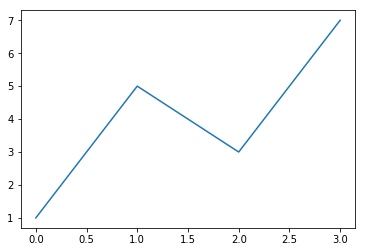

In [13]:
ser = pd.Series([1, 5, 3, 7])
ser.plot()
plt.show()

# time range

In [25]:
date_range = pd.date_range('2016/10/29 5:30pm', periods=12, freq='H')
date_range

DatetimeIndex(['2016-10-29 17:30:00', '2016-10-29 18:30:00',
               '2016-10-29 19:30:00', '2016-10-29 20:30:00',
               '2016-10-29 21:30:00', '2016-10-29 22:30:00',
               '2016-10-29 23:30:00', '2016-10-30 00:30:00',
               '2016-10-30 01:30:00', '2016-10-30 02:30:00',
               '2016-10-30 03:30:00', '2016-10-30 04:30:00'],
              dtype='datetime64[ns]', freq='H')

In [30]:
ser = pd.Series(np.random.random(12), date_range)
ser

2016-10-29 17:30:00    0.037887
2016-10-29 18:30:00    0.905179
2016-10-29 19:30:00    0.039249
2016-10-29 20:30:00    0.738482
2016-10-29 21:30:00    0.547678
2016-10-29 22:30:00    0.357375
2016-10-29 23:30:00    0.687425
2016-10-30 00:30:00    0.687023
2016-10-30 01:30:00    0.196641
2016-10-30 02:30:00    0.817097
2016-10-30 03:30:00    0.088780
2016-10-30 04:30:00    0.681304
Freq: H, dtype: float64

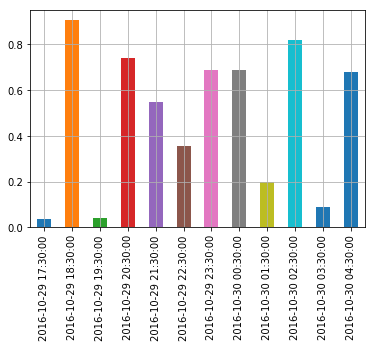

In [31]:
ser.plot(kind="bar")
plt.grid(True)
plt.show()

# resampling

In [32]:
resampling_ser = ser.resample("2H").mean()
resampling_ser

2016-10-29 16:00:00    0.037887
2016-10-29 18:00:00    0.472214
2016-10-29 20:00:00    0.643080
2016-10-29 22:00:00    0.522400
2016-10-30 00:00:00    0.441832
2016-10-30 02:00:00    0.452939
2016-10-30 04:00:00    0.681304
Freq: 2H, dtype: float64

In [33]:
resampling_ser = ser.resample("2H").apply(np.min)
resampling_ser

2016-10-29 16:00:00    0.037887
2016-10-29 18:00:00    0.039249
2016-10-29 20:00:00    0.547678
2016-10-29 22:00:00    0.357375
2016-10-30 00:00:00    0.196641
2016-10-30 02:00:00    0.088780
2016-10-30 04:00:00    0.681304
Freq: 2H, dtype: float64

In [34]:
resampling_ser = ser.resample("15Min").mean()
resampling_ser.head()

2016-10-29 17:30:00    0.037887
2016-10-29 17:45:00         NaN
2016-10-29 18:00:00         NaN
2016-10-29 18:15:00         NaN
2016-10-29 18:30:00    0.905179
Freq: 15T, dtype: float64

In [35]:
resampling_ser = ser.resample("15Min").interpolate(method="cubic")
resampling_ser.head()

2016-10-29 17:30:00    0.037887
2016-10-29 17:45:00    0.695043
2016-10-29 18:00:00    1.005721
2016-10-29 18:15:00    1.049305
2016-10-29 18:30:00    0.905179
Freq: 15T, dtype: float64

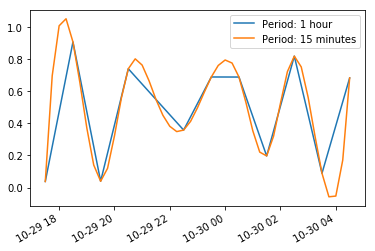

In [36]:
ser.plot(label="Period: 1 hour")
resampling_ser.plot(label="Period: 15 minutes")
plt.legend()
plt.show()

# timezone

In [41]:
tomezone_ser = ser.tz_localize("Asia/Taipei")
tomezone_ser

2016-10-29 17:30:00+08:00    0.037887
2016-10-29 18:30:00+08:00    0.905179
2016-10-29 19:30:00+08:00    0.039249
2016-10-29 20:30:00+08:00    0.738482
2016-10-29 21:30:00+08:00    0.547678
2016-10-29 22:30:00+08:00    0.357375
2016-10-29 23:30:00+08:00    0.687425
2016-10-30 00:30:00+08:00    0.687023
2016-10-30 01:30:00+08:00    0.196641
2016-10-30 02:30:00+08:00    0.817097
2016-10-30 03:30:00+08:00    0.088780
2016-10-30 04:30:00+08:00    0.681304
Freq: H, dtype: float64

In [42]:
tomezone_ser = ser.tz_localize("America/New_York").tz_convert("Europe/Paris")
tomezone_ser

2016-10-29 23:30:00+02:00    0.037887
2016-10-30 00:30:00+02:00    0.905179
2016-10-30 01:30:00+02:00    0.039249
2016-10-30 02:30:00+02:00    0.738482
2016-10-30 02:30:00+01:00    0.547678
2016-10-30 03:30:00+01:00    0.357375
2016-10-30 04:30:00+01:00    0.687425
2016-10-30 05:30:00+01:00    0.687023
2016-10-30 06:30:00+01:00    0.196641
2016-10-30 07:30:00+01:00    0.817097
2016-10-30 08:30:00+01:00    0.088780
2016-10-30 09:30:00+01:00    0.681304
Freq: H, dtype: float64

In [43]:
try:
    tomezone_ser.tz_localize(None).tz_localize("Europe/Paris")
except Exception as e:
    print(type(e))
    print(e)

<class 'pytz.exceptions.AmbiguousTimeError'>
Cannot infer dst time from '2016-10-30 02:30:00', try using the 'ambiguous' argument


In [44]:
tomezone_ser.tz_localize(None).tz_localize("Europe/Paris", ambiguous="infer")

2016-10-29 23:30:00+02:00    0.037887
2016-10-30 00:30:00+02:00    0.905179
2016-10-30 01:30:00+02:00    0.039249
2016-10-30 02:30:00+02:00    0.738482
2016-10-30 02:30:00+01:00    0.547678
2016-10-30 03:30:00+01:00    0.357375
2016-10-30 04:30:00+01:00    0.687425
2016-10-30 05:30:00+01:00    0.687023
2016-10-30 06:30:00+01:00    0.196641
2016-10-30 07:30:00+01:00    0.817097
2016-10-30 08:30:00+01:00    0.088780
2016-10-30 09:30:00+01:00    0.681304
Freq: H, dtype: float64

# period

In [45]:
quarters = pd.period_range('2016Q1', periods=8, freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [46]:
quarters + 1

PeriodIndex(['2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4', '2018Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [47]:
quarters.asfreq("M")

PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]', freq='M')

In [48]:
quarters.asfreq("M", how="start")

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10'],
            dtype='period[M]', freq='M')

In [49]:
ser = pd.Series(np.random.random(8), index = quarters)
ser

2016Q1    0.666490
2016Q2    0.998494
2016Q3    0.177914
2016Q4    0.453197
2017Q1    0.986418
2017Q2    0.967404
2017Q3    0.240901
2017Q4    0.377629
Freq: Q-DEC, dtype: float64

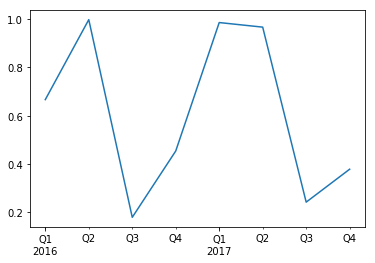

In [50]:
ser.plot(kind="line")
plt.show()

In [51]:
timestamp_ser = ser.to_timestamp(how="end", freq="H")
timestamp_ser

2016-03-31 23:00:00    0.666490
2016-06-30 23:00:00    0.998494
2016-09-30 23:00:00    0.177914
2016-12-31 23:00:00    0.453197
2017-03-31 23:00:00    0.986418
2017-06-30 23:00:00    0.967404
2017-09-30 23:00:00    0.240901
2017-12-31 23:00:00    0.377629
Freq: Q-DEC, dtype: float64

In [52]:
timestamp_ser.to_period()

2016Q1    0.666490
2016Q2    0.998494
2016Q3    0.177914
2016Q4    0.453197
2017Q1    0.986418
2017Q2    0.967404
2017Q3    0.240901
2017Q4    0.377629
Freq: Q-DEC, dtype: float64

# create a dataframe

In [17]:
dictionary = {
    "one": pd.Series([0, 1, 2, 3], index=["a", "b", "c", "d"]),
    "two": pd.Series(["AA", "BB"], index=["b", "d"]),
    "three": pd.Series([20.0, 30.0], index=["c", "d"])
}
dataFrame = pd.DataFrame(dictionary)
dataFrame

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20.0
d,3,BB,30.0


In [62]:
dictionary = {
    "one": {"a" : 0, "b" : 1, "c" : 2, "d" : 3},
    "two": {"b" : "AA", "d" : "BB"},
    "three": {"c" : 20.0, "d" : 30.0}
}
dataFrame = pd.DataFrame(dictionary)
dataFrame

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20.0
d,3,BB,30.0


In [63]:
dataFrame.loc["d"]

one       3
two      BB
three    30
Name: d, dtype: object

In [64]:
dataFrame.iloc[3]

one       3
two      BB
three    30
Name: d, dtype: object

In [13]:
dataFrame["one"]

a    0
b    1
c    2
d    3
Name: one, dtype: int64

In [14]:
dataFrame[["one", "three"]]

,one,three
a,0,NaN
b,1,NaN
c,2,20.0
d,3,30.0


In [16]:
new_dataFrame = pd.DataFrame(
        dictionary,
        columns=["one", "three"],
        index=["c", "d"]
     )
new_dataFrame

,one,three
c,2,20
d,3,30


In [36]:
array = [
    [0, np.nan, np.nan],
    [1, "AA", np.nan],
    [2, np.nan, 20.0],
    [3, "BB", 30.0]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c", "d"]
)
dataFrame

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20.0
d,3,BB,30.0


In [37]:
dataFrame_from_dataFrame = pd.DataFrame(
    dataFrame,
    columns=["one", "three"],
    index=["c", "d"]
)
dataFrame_from_dataFrame

,one,three
c,2,20.0
d,3,30.0


# add / delete column

In [80]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [70]:
dataFrame["four"] = dataFrame["three"] * 10
dataFrame

,one,two,three,four
a,0,1,2,20
b,3,4,5,50
c,6,7,8,80


In [74]:
dataFrame["five"] = pd.Series([30, 32, 33], index=["a", "c", "d"])
dataFrame

,one,two,three,four,five
a,0,1,2,20,30.0
b,3,4,5,50,NaN
c,6,7,8,80,32.0


In [75]:
dataFrame.insert(1, "six", [41, 42, 43])
dataFrame

,one,six,two,three,four,five
a,0,41,1,2,20,30.0
b,3,42,4,5,50,NaN
c,6,43,7,8,80,32.0


In [82]:
assigned_dataFrame = dataFrame.assign(
    seven = dataFrame["three"] * 50,
    eight = dataFrame["three"]  > 3
)
assigned_dataFrame

,one,two,three,seven,eight
a,0,1,2,100,False
b,3,4,5,250,True
c,6,7,8,400,True


In [88]:
assigned_dataFrame = dataFrame \
    .assign(night = lambda df : df["three"] * 60) \
    .assign(ten = lambda df : df["night"]  > 300)
assigned_dataFrame

,one,two,three,night,ten
a,0,1,2,120,False
b,3,4,5,300,False
c,6,7,8,480,True


In [76]:
dataFrame.pop("four")
dataFrame

,one,six,two,three,five
a,0,41,1,2,30.0
b,3,42,4,5,NaN
c,6,43,7,8,32.0


In [77]:
del dataFrame["three"]
dataFrame

,one,six,two,five
a,0,41,1,30.0
b,3,42,4,NaN
c,6,43,7,32.0


# masked

In [33]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
masked_array = np.ma.asarray(array, dtype=np.object)
masked_array[(0, 1), (0, 1)] = np.ma.masked
dataFrame = pd.DataFrame(
    masked_array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,NaN,1,2
b,3,NaN,5
c,6,7,8


In [22]:
masked_array = np.ma.asarray(array, dtype=np.object)
masked_array[(0, 2), (1, 2)] = np.ma.masked
d3 = pd.DataFrame(
    masked_array,
    columns=["one", "two", "three"],
    index=["a", "b", "c", "d"]
)
d3

,one,two,three
a,0,NaN,NaN
b,1,AA,NaN
c,2,NaN,20
d,3,BB,30


# multi-indexing

In [49]:
dataFrame = pd.DataFrame({
    ("public", "birthyear"):{
        ("Paris","alice"):1985, 
        ("Paris","bob"): 1984, 
        ("London","charles"): 1992
    },
    ("public", "hobby"):{
        ("Paris","alice"):"Biking", 
        ("Paris","bob"): "Dancing"
    },
    ("private", "weight"):{
        ("Paris","alice"):68, 
        ("Paris","bob"): 83, 
        ("London","charles"): 112
    },
    ("private", "children"):{
        ("Paris", "alice"):np.nan, 
        ("Paris","bob"): 3, 
        ("London","charles"): 0
    }
})
dataFrame

public          private         
               birthyear    hobby  weight children
London charles      1992      NaN     112      0.0
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0

In [42]:
dataFrame["public"]

birthyear    hobby
London charles       1992      NaN
Paris  alice         1985   Biking
       bob           1984  Dancing

In [43]:
dataFrame["public", "hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: (public, hobby), dtype: object

In [44]:
dataFrame["public"]["hobby"]

London  charles        NaN
Paris   alice       Biking
        bob        Dancing
Name: hobby, dtype: object

# drop level

In [50]:
dataFrame.columns = dataFrame.columns.droplevel(level = 0)
dataFrame

birthyear    hobby  weight  children
London charles       1992      NaN     112       0.0
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0

# transposing

In [53]:
dataFrame.T

London   Paris         
          charles   alice      bob
birthyear    1992    1985     1984
hobby         NaN  Biking  Dancing
weight        112      68       83
children        0     NaN        3

# stacking and unstacking

In [54]:
stacked_dataFrame = dataFrame.stack()
stacked_dataFrame

London  charles  birthyear       1992
                 weight           112
                 children           0
Paris   alice    birthyear       1985
                 hobby         Biking
                 weight            68
        bob      birthyear       1984
                 hobby        Dancing
                 weight            83
                 children           3
dtype: object

In [55]:
unstacked_dataFrame = stacked_dataFrame.unstack()
unstacked_dataFrame

birthyear    hobby weight children
London charles      1992      NaN    112        0
Paris  alice        1985   Biking     68      NaN
       bob          1984  Dancing     83        3

# evaluating

In [89]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


In [98]:
dataFrame.eval("one * 2")

a     0
b     6
c    12
dtype: int64

In [97]:
parameter = 2
dataFrame.eval("one * @parameter")

a     0
b     6
c    12
dtype: int64

In [99]:
dataFrame.query("one > 0 and two == 4")

,one,two,three
b,3,4,5


# sorting a dataframe

In [100]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["three", "two", "one"],
    index=["c", "b", "a"]
)
dataFrame

,three,two,one
c,0,1,2
b,3,4,5
a,6,7,8


In [103]:
dataFrame.sort_index(ascending=True)

,three,two,one
a,6,7,8
b,3,4,5
c,0,1,2


In [104]:
dataFrame.sort_index(axis=1, ascending=True)

,one,three,two
c,2,0,1
b,5,3,4
a,8,6,7


In [105]:
dataFrame.sort_values(by="one", ascending=False)

,three,two,one
a,6,7,8
b,3,4,5
c,0,1,2


# plotting a dataframe

In [111]:
array = [
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
]
dataFrame = pd.DataFrame(
    array,
    columns=["one", "two", "three"],
    index=["a", "b", "c"]
)
dataFrame

,one,two,three
a,0,1,2
b,3,4,5
c,6,7,8


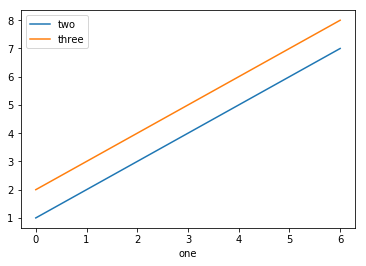

In [112]:
dataFrame.plot(kind = "line", x = "one", y = ["two", "three"])
plt.show()

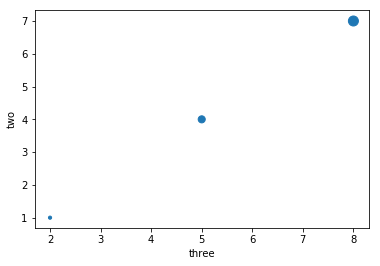

In [116]:
dataFrame.plot(kind = "scatter", x = "three", y = "two", s=[10, 50, 100])
plt.show()